# Assignment 4

What are the score distributions? Which one gives the most good ratings? Which one is the most difficult to please?  

Community vs Critics!  
Lets compare the movie rating distribution!  

In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

sns.set_style("dark")

In [15]:
moviedb = pd.read_csv("allmovies.csv")
moviedb = moviedb.rename(columns = {"avg_vote": "IMDb", "tomatometer_rating": "RT Critics", "audience_rating": "RT Users", "year": "Year"})
moviedb["RT Users"] = round(moviedb["RT Users"]/10,1)
moviedb["RT Critics"] = round(moviedb["RT Critics"]/10,1)
ratings = moviedb[["IMDb", "RT Critics", "RT Users"]].copy()


In [16]:
by_year = moviedb[["IMDb", "RT Critics", "RT Users", "Year"]].copy()
all_years = by_year.groupby("Year").mean()
past_years = by_year[by_year["Year"] < 1940][["IMDb", "RT Critics", "RT Users"]]
mid_years = by_year[(by_year["Year"] < 1980) & (by_year["Year"] >= 1940)][["IMDb", "RT Critics", "RT Users"]]
late_years = by_year[by_year["Year"] >= 1980][["IMDb", "RT Critics", "RT Users"]]

imdb = pd.DataFrame([], columns=["Who", "rating"])
imdb["rating"] = ratings["IMDb"]
imdb["Who"] = "IMDb"

rtcrit = pd.DataFrame([], columns=["Who", "rating"])
rtcrit["rating"] = ratings["RT Critics"]
rtcrit["Who"] = "RT Critics"

rtusers = pd.DataFrame([], columns=["Who", "rating"])
rtusers["rating"] = ratings["RT Users"]
rtusers["Who"] = "RT Users"

violin_data = imdb.append(rtcrit.append(rtusers)).reset_index(drop=True)

colores = sns.color_palette(["goldenrod", "red", "limegreen", "r"])

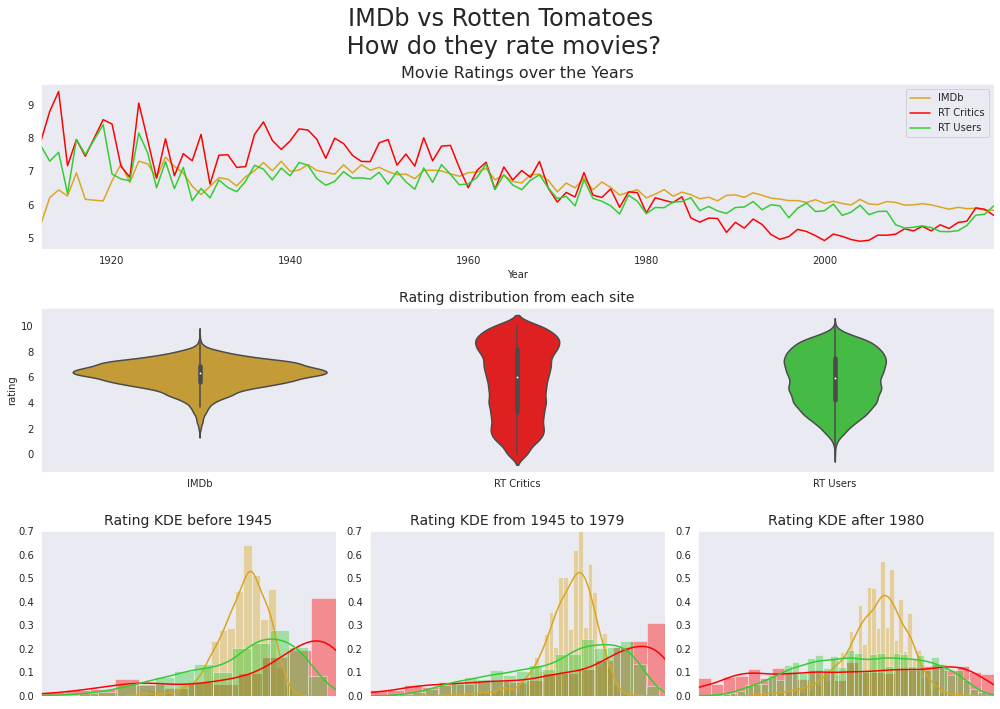

In [17]:
def plot_assignment():
    
    fig = plt.figure(figsize=(14,10))
    gs = fig.add_gridspec(3, 3)
    rating_over_years = fig.add_subplot(gs[0, :])
    past = fig.add_subplot(gs[2, 0])
    mid = fig.add_subplot(gs[2, 1])
    late = fig.add_subplot(gs[2, 2])
    vaginas = fig.add_subplot(gs[1,:])
    
    #Titles
    fig.suptitle("IMDb vs Rotten Tomatoes\n How do they rate movies?", fontsize=24)
    rating_over_years.set_title("Movie Ratings over the Years", fontsize=16)
    past.set_title("Rating KDE before 1945",fontsize=14)
    mid.set_title("Rating KDE from 1945 to 1979",fontsize=14)
    late.set_title("Rating KDE after 1980",fontsize=14)
    vaginas.set_title("Rating distribution from each site",fontsize=14)
    
    #Yearly rating
    all_years.plot(ax=rating_over_years, color=["goldenrod", "red", "limegreen"])
    
    #Violins
    sns.violinplot("Who", "rating", data=violin_data, ax=vaginas, orient="v", palette=colores)
    
    #kde before 1945
    sns.distplot(past_years["IMDb"], ax=past, color="goldenrod")
    sns.distplot(past_years["RT Critics"], ax=past, color="red")
    sns.distplot(past_years["RT Users"], ax=past, color="limegreen")

    #kde in between
    sns.distplot(mid_years["IMDb"], ax=mid, color="goldenrod")
    sns.distplot(mid_years["RT Critics"], ax=mid, color="red")
    sns.distplot(mid_years["RT Users"], ax=mid, color="limegreen")

    
    #kde after 1980
    sns.distplot(late_years["IMDb"], ax=late, color="goldenrod")
    sns.distplot(late_years["RT Critics"], ax=late, color="red")
    sns.distplot(late_years["RT Users"], ax=late, color="limegreen")
    
    #Final tweeking
    plt.setp(rating_over_years, xlim=(1912,2019))
    plt.setp(mid, ylim=(0,.7), xlim=(0,10), xticks=[], xlabel="")
    plt.setp(past, ylim=(0,.7), xlim=(0,10), xticks=[], xlabel="")
    plt.setp(late, ylim=(0,.7), xlim=(0,10), xticks=[], xlabel="")
    plt.setp(vaginas,xlabel="")
    plt.tight_layout()
    
plot_assignment()